In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [8]:
se_pbs = pd.read_csv('/Users/maxalekhnovich/Downloads/2017-18_playerBoxScore.csv')


('number of rows in sepbs', 26109)


In [24]:
rowNumber = len(se_pbs)
print("number of rows in sepbs",rowNumber)
columns  = se_pbs.columns
print("columns in sepbs are ",columns)

In [32]:

# anyNulls = se_pbs.isnull().values.sum()
#There are nulls 
#how many nulls are there in the dataset
totalNulls = se_pbs.isnull().values.sum()
print("There are this many nulls in sepb",totalNulls)



('There are this many nulls in sepb', 0)


In [25]:
#creating a function for null values
def num_missing(x):
    return sum(x.isnull())
#applying per column
print("Missing values per column")
print(se_pbs.apply(num_missing,axis = 0))
#axis equaling zero to be applied on each column
print(se_pbs.apply(num_missing,axis = 1).head())
#axis equaling 1 to be applied on each row

Missing values per column


gmDate        0
gmTime        0
seasTyp       0
playLNm       0
playFNm       0
teamAbbr      0
teamConf      0
teamDiv       0
teamLoc       0
teamRslt      0
teamDayOff    0
offLNm1       0
offFNm1       0
offLNm2       0
offFNm2       0
offLNm3       0
offFNm3       0
playDispNm    0
playStat      0
playMin       0
playPos       0
playHeight    0
playWeight    0
playBDate     0
playPTS       0
playAST       0
playTO        0
playSTL       0
playBLK       0
playPF        0
playFGA       0
playFGM       0
playFG%       0
play2PA       0
play2PM       0
play2P%       0
play3PA       0
play3PM       0
play3P%       0
playFTA       0
playFTM       0
playFT%       0
playORB       0
playDRB       0
playTRB       0
opptAbbr      0
opptConf      0
opptDiv       0
opptLoc       0
opptRslt      0
opptDayOff    0
dtype: int64


0    0
1    0
2    0
3    0
4    0
dtype: int64


In [35]:
#get basic info for dataset
# se_pbs.shape()
se_pbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26109 entries, 0 to 26108
Data columns (total 51 columns):
gmDate        26109 non-null object
gmTime        26109 non-null object
seasTyp       26109 non-null object
playLNm       26109 non-null object
playFNm       26109 non-null object
teamAbbr      26109 non-null object
teamConf      26109 non-null object
teamDiv       26109 non-null object
teamLoc       26109 non-null object
teamRslt      26109 non-null object
teamDayOff    26109 non-null int64
offLNm1       26109 non-null object
offFNm1       26109 non-null object
offLNm2       26109 non-null object
offFNm2       26109 non-null object
offLNm3       26109 non-null object
offFNm3       26109 non-null object
playDispNm    26109 non-null object
playStat      26109 non-null object
playMin       26109 non-null int64
playPos       26109 non-null object
playHeight    26109 non-null int64
playWeight    26109 non-null int64
playBDate     26109 non-null object
playPTS       26109 non-null in

In [18]:
#replace null values with mean for offLNm3
mode(se_pbs['offLNm3']).mode[0]
se_pbs['offLNm3'].fillna(mode(se_pbs['offLNm3']).mode[0],inplace = True)
print(se_pbs.apply(num_missing,axis = 0))

gmDate         0
gmTime         0
seasTyp        0
playLNm        0
playFNm        0
teamAbbr       0
teamConf       0
teamDiv        0
teamLoc        0
teamRslt       0
teamDayOff     0
offLNm1        0
offFNm1        0
offLNm2        0
offFNm2        0
offLNm3        0
offFNm3       20
playDispNm     0
playStat       0
playMin        0
playPos        0
playHeight     0
playWeight     0
playBDate      0
playPTS        0
playAST        0
playTO         0
playSTL        0
playBLK        0
playPF         0
playFGA        0
playFGM        0
playFG%        0
play2PA        0
play2PM        0
play2P%        0
play3PA        0
play3PM        0
play3P%        0
playFTA        0
playFTM        0
playFT%        0
playORB        0
playDRB        0
playTRB        0
opptAbbr       0
opptConf       0
opptDiv        0
opptLoc        0
opptRslt       0
opptDayOff     0
dtype: int64


In [19]:
#replacing null values for offFNm3
mode(se_pbs['offFNm3']).mode[0]
se_pbs['offFNm3'].fillna(mode(se_pbs['offFNm3']).mode[0],inplace = True)
print(se_pbs.apply(num_missing,axis = 0))

gmDate        0
gmTime        0
seasTyp       0
playLNm       0
playFNm       0
teamAbbr      0
teamConf      0
teamDiv       0
teamLoc       0
teamRslt      0
teamDayOff    0
offLNm1       0
offFNm1       0
offLNm2       0
offFNm2       0
offLNm3       0
offFNm3       0
playDispNm    0
playStat      0
playMin       0
playPos       0
playHeight    0
playWeight    0
playBDate     0
playPTS       0
playAST       0
playTO        0
playSTL       0
playBLK       0
playPF        0
playFGA       0
playFGM       0
playFG%       0
play2PA       0
play2PM       0
play2P%       0
play3PA       0
play3PM       0
play3P%       0
playFTA       0
playFTM       0
playFT%       0
playORB       0
playDRB       0
playTRB       0
opptAbbr      0
opptConf      0
opptDiv       0
opptLoc       0
opptRslt      0
opptDayOff    0
dtype: int64


In [28]:
#get datatypes
se_pbs.dtypes

gmDate         object
gmTime         object
seasTyp        object
playLNm        object
playFNm        object
teamAbbr       object
teamConf       object
teamDiv        object
teamLoc        object
teamRslt       object
teamDayOff      int64
offLNm1        object
offFNm1        object
offLNm2        object
offFNm2        object
offLNm3        object
offFNm3        object
playDispNm     object
playStat       object
playMin         int64
playPos        object
playHeight      int64
playWeight      int64
playBDate      object
playPTS         int64
playAST         int64
playTO          int64
playSTL         int64
playBLK         int64
playPF          int64
playFGA         int64
playFGM         int64
playFG%       float64
play2PA         int64
play2PM         int64
play2P%       float64
play3PA         int64
play3PM         int64
play3P%       float64
playFTA         int64
playFTM         int64
playFT%       float64
playORB         int64
playDRB         int64
playTRB         int64
opptAbbr  

In [37]:
pd.crosstab(se_pbs["play3P%"],se_pbs["play3PM"],margins=True)

play3PM,0,1,2,3,4,5,6,7,8,9,10,All
play3P%,,,,,,,,,,,,
0.0,13325,0,0,0,0,0,0,0,0,0,0,13325
0.0833,0,2,0,0,0,0,0,0,0,0,0,2
0.0909,0,4,0,0,0,0,0,0,0,0,0,4
0.1,0,7,0,0,0,0,0,0,0,0,0,7
0.1111,0,20,0,0,0,0,0,0,0,0,0,20
0.125,0,59,0,0,0,0,0,0,0,0,0,59
0.1429,0,120,0,0,0,0,0,0,0,0,0,120
0.1538,0,0,1,0,0,0,0,0,0,0,0,1
0.1667,0,297,4,0,0,0,0,0,0,0,0,301


/Users/maxalekhnovich/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


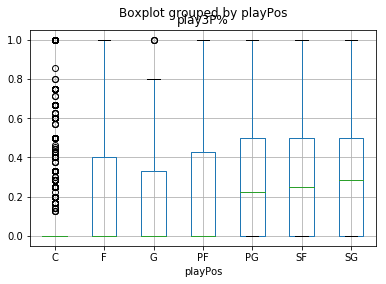

In [27]:
%matplotlib inline
se_pbs.boxplot(column="play3P%",by="playPos")

            teamDayOff   playMin  playHeight  playWeight   playPTS   playAST  \
teamDayOff    1.000000  0.005236    0.000506    0.001477  0.007037  0.011228   
playMin       0.005236  1.000000   -0.061622   -0.061942  0.724358  0.508307   
playHeight    0.000506 -0.061622    1.000000    0.799251 -0.035368 -0.299344   
playWeight    0.001477 -0.061942    0.799251    1.000000 -0.019173 -0.247326   
playPTS       0.007037  0.724358   -0.035368   -0.019173  1.000000  0.423531   
playAST       0.011228  0.508307   -0.299344   -0.247326  0.423531  1.000000   
playTO        0.006013  0.450443   -0.071639   -0.037629  0.412318  0.401641   
playSTL       0.005246  0.368572   -0.114061   -0.105558  0.289436  0.276852   
playBLK       0.011081  0.230761    0.264943    0.219054  0.187561  0.047885   
playPF       -0.001880  0.388199    0.107615    0.106330  0.265982  0.155650   
playFGA       0.007958  0.785991   -0.092629   -0.072899  0.875387  0.470358   
playFGM       0.010437  0.703696   -0.00

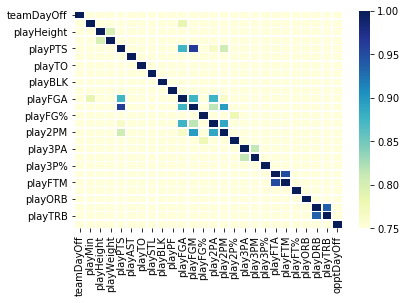

In [63]:
sns.heatmap(se_pbs.corr(),vmin=.75,cmap = "YlGnBu", linewidths=.5)
corr = se_pbs.corr()
print(corr)

In [60]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,teamDayOff,playMin,playHeight,playWeight,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptDayOff
teamDayOff,1,0.0052,0.00051,0.0015,0.007,0.011,0.006,0.0052,0.011,-0.0019,0.008,0.01,-0.0037,0.0048,0.009,-0.0015,0.0087,0.0063,-0.0039,-0.005,-0.0067,-0.0037,0.0066,0.0079,0.0088,0.47
playMin,0.0052,1,-0.062,-0.062,0.72,0.51,0.45,0.37,0.23,0.39,0.79,0.7,0.25,0.67,0.6,0.26,0.54,0.44,0.27,0.46,0.45,0.4,0.26,0.54,0.53,0.0019
playHeight,0.00051,-0.062,1,0.8,-0.035,-0.3,-0.072,-0.11,0.26,0.11,-0.093,-0.0038,0.12,0.045,0.097,0.094,-0.26,-0.19,-0.17,0.035,-0.00081,-0.007,0.33,0.28,0.35,0.0011
playWeight,0.0015,-0.062,0.8,1,-0.019,-0.25,-0.038,-0.11,0.22,0.11,-0.073,0.0093,0.12,0.054,0.1,0.089,-0.23,-0.17,-0.16,0.049,0.012,-0.0039,0.33,0.29,0.35,0.00082
playPTS,0.007,0.72,-0.035,-0.019,1,0.42,0.41,0.29,0.19,0.27,0.88,0.96,0.44,0.76,0.81,0.38,0.57,0.62,0.4,0.63,0.64,0.49,0.23,0.43,0.43,0.0036
playAST,0.011,0.51,-0.3,-0.25,0.42,1,0.4,0.28,0.048,0.16,0.47,0.4,0.084,0.41,0.35,0.11,0.31,0.24,0.15,0.3,0.31,0.23,0.031,0.25,0.21,0.0036
playTO,0.006,0.45,-0.072,-0.038,0.41,0.4,1,0.22,0.12,0.27,0.43,0.39,0.12,0.4,0.36,0.12,0.25,0.2,0.11,0.33,0.31,0.23,0.14,0.31,0.3,-0.0021
playSTL,0.0052,0.37,-0.11,-0.11,0.29,0.28,0.22,1,0.075,0.14,0.31,0.28,0.091,0.27,0.25,0.11,0.21,0.16,0.1,0.2,0.19,0.17,0.072,0.17,0.16,0.011
playBLK,0.011,0.23,0.26,0.22,0.19,0.048,0.12,0.075,1,0.15,0.17,0.2,0.13,0.24,0.24,0.12,-0.02,-0.017,-0.034,0.18,0.15,0.11,0.24,0.32,0.34,0.0023
playPF,-0.0019,0.39,0.11,0.11,0.27,0.16,0.27,0.14,0.15,1,0.27,0.27,0.16,0.27,0.26,0.15,0.13,0.11,0.07,0.2,0.18,0.17,0.2,0.27,0.29,-0.0041
